```json
{
     "_id" : ObjectId("5b107bec1d2952d0da904dd7"),
     "title" : "Titan A.E.",
     "year" : 2000,
     "rated" : "PG",
     "runtime" : 94,
     "countries" : [
             "USA"
     ],
     "genres" : [
             "Animation",
             "Action",
             "Adventure"
     ],
     "director" : "Don Bluth, Gary Goldman, Art Vitello",
     "writers" : [
             "Hans Bauer",
             "Randall McCormick",
             "Ben Edlund",
             "John August",
             "Joss Whedon"
     ],
     "actors" : [
             "Matt Damon",
             "Bill Pullman",
             "John Leguizamo",
             "Nathan Lane"
     ],
     "plot" : "A young man learns that he has to find a hidden Earth ship before an enemy alien species does in order to secure the survival of humanity.",
     "poster" : "http://ia.media-imdb.com/images/M/MV5BMjE0NTU0ODg4NV5BMl5BanBnXkFtZTcwNzY3MTQyMQ@@._V1_SX300.jpg",
     "imdb" : {
             "id" : "tt0120913",
             "rating" : 6.6,
             "votes" : 50875
     },
     "tomato" : {
             "meter" : 52,
             "image" : "rotten",
             "rating" : 5.7,
             "reviews" : 99,
             "fresh" : 51,
             "consensus" : "Great visuals, but the story feels like a cut-and-paste job of other sci-fi movies.",
             "userMeter" : 60,
             "userRating" : 3.2,
             "userReviews" : 69055
     },
     "metacritic" : 48,
     "awards" : {
             "wins" : 1,
             "nominations" : 7,
             "text" : "1 win & 7 nominations."
     },
     "type" : "movie"
}
```

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint as pp
%matplotlib inline

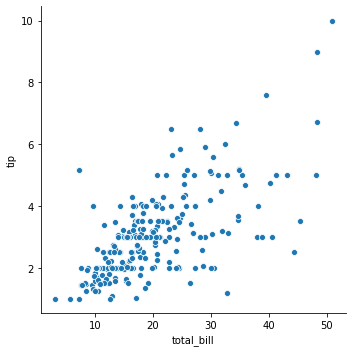

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [3]:
pp(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [7]:
pip install pymongo

  Using cached https://files.pythonhosted.org/packages/dc/9b/6791f7219f3573bfaa2251da4d814f4fbc49f0bbb258df1e08f7d89a7b85/pymongo-3.10.1.tar.gz
  Running setup.py install for pymongo ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from pymongo import MongoClient

In [9]:
client = MongoClient('localhost', 27017)

In [21]:
db = client.datascience

In [23]:
data = list(db.movies.aggregate([
    {"$match": {"imdb.rating": {"$exists": "1", "$gte": 0, "$lte": 10}}},
    {"$project": {'rating': '$imdb.rating'}},
    {"$group": {"_id": "$rating", "count": {"$sum": 1}}},
    {"$sort": {"_id": 1}}
]))

In [25]:
df = pd.DataFrame(data)
df = df.rename(columns={"_id": "rating"})

In [26]:
df

,rating,count
0,1.2,1
1,1.4,1
2,1.7,1
3,1.8,1
4,1.9,2
...,...,...
72,8.9,1
73,9.0,7
74,9.2,1
75,9.5,1


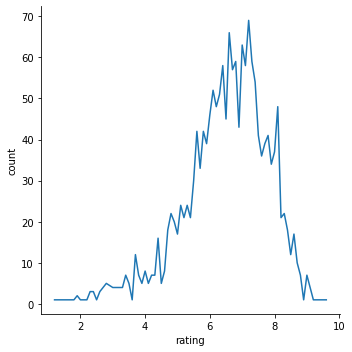

In [27]:
sns.relplot(x="rating", y="count", data=df,  kind="line");

#avarage user rating, runtime

In [31]:
data = list(db.movies.aggregate([
    {
        "$match": 
         {
            "imdb.rating": {"$exists": "1", "$gte": 0, "$lte": 10},
            "runtime": {"$exists": "1"}
        },
    },
    {"$project": {'rating': '$imdb.rating', "runtime": "$runtime"}},
    {"$sort": {"_id": 1}}
]))

df = pd.DataFrame(data)



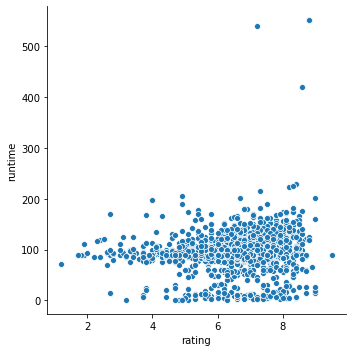

In [32]:
sns.relplot(x="rating", y="runtime", data=df);

Avg rating to votes count

In [38]:
data = list(db.movies.aggregate([
    {"$match": {
        "imdb.rating": {"$exists": "1", "$gte": 0, "$lte": 10},
        "year": {"$gte": 2000}
    }},
    {"$project": {'rating': '$imdb.rating', "year": "$year"}},
    {"$group": {
        "_id": {
            "year": "$year",
            "rating": "$rating"
        },
        "count": {"$sum": 1}}
    },
    {"$project": {
        "rating": "$_id.rating",
        "year": "$_id.year",
        "count": "$count"
    }},
    {"$sort": {"rating": -1}}
]))

In [39]:
pp(list(data))

[{'_id': {'rating': 9.6, 'year': 2005},
  'count': 1,
  'rating': 9.6,
  'year': 2005},
 {'_id': {'rating': 9.5, 'year': 2005},
  'count': 1,
  'rating': 9.5,
  'year': 2005},
 {'_id': {'rating': 9.2, 'year': 2000},
  'count': 1,
  'rating': 9.2,
  'year': 2000},
 {'_id': {'rating': 9, 'year': 2014}, 'count': 1, 'rating': 9, 'year': 2014},
 {'_id': {'rating': 9, 'year': 2010}, 'count': 2, 'rating': 9, 'year': 2010},
 {'_id': {'rating': 9, 'year': 2006}, 'count': 1, 'rating': 9, 'year': 2006},
 {'_id': {'rating': 9, 'year': 2011}, 'count': 1, 'rating': 9, 'year': 2011},
 {'_id': {'rating': 9, 'year': 2007}, 'count': 1, 'rating': 9, 'year': 2007},
 {'_id': {'rating': 8.8, 'year': 2011},
  'count': 1,
  'rating': 8.8,
  'year': 2011},
 {'_id': {'rating': 8.8, 'year': 2002},
  'count': 3,
  'rating': 8.8,
  'year': 2002},
 {'_id': {'rating': 8.8, 'year': 2005},
  'count': 1,
  'rating': 8.8,
  'year': 2005},
 {'_id': {'rating': 8.7, 'year': 2004},
  'count': 1,
  'rating': 8.7,
  'year': 2

 {'_id': {'rating': 7.1, 'year': 2004},
  'count': 1,
  'rating': 7.1,
  'year': 2004},
 {'_id': {'rating': 7.1, 'year': 2009},
  'count': 4,
  'rating': 7.1,
  'year': 2009},
 {'_id': {'rating': 7.1, 'year': 2001},
  'count': 2,
  'rating': 7.1,
  'year': 2001},
 {'_id': {'rating': 7.1, 'year': 2006},
  'count': 2,
  'rating': 7.1,
  'year': 2006},
 {'_id': {'rating': 7.1, 'year': 2012},
  'count': 4,
  'rating': 7.1,
  'year': 2012},
 {'_id': {'rating': 7.1, 'year': 2015},
  'count': 1,
  'rating': 7.1,
  'year': 2015},
 {'_id': {'rating': 7.1, 'year': 2014},
  'count': 1,
  'rating': 7.1,
  'year': 2014},
 {'_id': {'rating': 7.1, 'year': 2000},
  'count': 3,
  'rating': 7.1,
  'year': 2000},
 {'_id': {'rating': 7.1, 'year': 2013},
  'count': 4,
  'rating': 7.1,
  'year': 2013},
 {'_id': {'rating': 7.1, 'year': 2003},
  'count': 2,
  'rating': 7.1,
  'year': 2003},
 {'_id': {'rating': 7, 'year': 2002}, 'count': 1, 'rating': 7, 'year': 2002},
 {'_id': {'rating': 7, 'year': 2005}, 'cou

  'year': 2000},
 {'_id': {'rating': 6.1, 'year': 2005},
  'count': 2,
  'rating': 6.1,
  'year': 2005},
 {'_id': {'rating': 6.1, 'year': 2012},
  'count': 3,
  'rating': 6.1,
  'year': 2012},
 {'_id': {'rating': 6.1, 'year': 2014},
  'count': 2,
  'rating': 6.1,
  'year': 2014},
 {'_id': {'rating': 6.1, 'year': 2009},
  'count': 3,
  'rating': 6.1,
  'year': 2009},
 {'_id': {'rating': 6.1, 'year': 2007},
  'count': 1,
  'rating': 6.1,
  'year': 2007},
 {'_id': {'rating': 6.1, 'year': 2002},
  'count': 3,
  'rating': 6.1,
  'year': 2002},
 {'_id': {'rating': 6.1, 'year': 2011},
  'count': 4,
  'rating': 6.1,
  'year': 2011},
 {'_id': {'rating': 6.1, 'year': 2008},
  'count': 4,
  'rating': 6.1,
  'year': 2008},
 {'_id': {'rating': 6.1, 'year': 2004},
  'count': 2,
  'rating': 6.1,
  'year': 2004},
 {'_id': {'rating': 6.1, 'year': 2001},
  'count': 2,
  'rating': 6.1,
  'year': 2001},
 {'_id': {'rating': 6, 'year': 2010}, 'count': 1, 'rating': 6, 'year': 2010},
 {'_id': {'rating': 6, 'y

 {'_id': {'rating': 4.2, 'year': 2009},
  'count': 1,
  'rating': 4.2,
  'year': 2009},
 {'_id': {'rating': 4.2, 'year': 2005},
  'count': 1,
  'rating': 4.2,
  'year': 2005},
 {'_id': {'rating': 4.2, 'year': 2003},
  'count': 2,
  'rating': 4.2,
  'year': 2003},
 {'_id': {'rating': 4.2, 'year': 2006},
  'count': 1,
  'rating': 4.2,
  'year': 2006},
 {'_id': {'rating': 4.1, 'year': 2007},
  'count': 1,
  'rating': 4.1,
  'year': 2007},
 {'_id': {'rating': 4.1, 'year': 2000},
  'count': 1,
  'rating': 4.1,
  'year': 2000},
 {'_id': {'rating': 4.1, 'year': 2004},
  'count': 1,
  'rating': 4.1,
  'year': 2004},
 {'_id': {'rating': 4, 'year': 2002}, 'count': 1, 'rating': 4, 'year': 2002},
 {'_id': {'rating': 4, 'year': 2003}, 'count': 1, 'rating': 4, 'year': 2003},
 {'_id': {'rating': 4, 'year': 2008}, 'count': 1, 'rating': 4, 'year': 2008},
 {'_id': {'rating': 3.9, 'year': 2014},
  'count': 1,
  'rating': 3.9,
  'year': 2014},
 {'_id': {'rating': 3.9, 'year': 2011},
  'count': 2,
  'ratin

In [40]:
df = pd.DataFrame(data)
df = df[['count', 'rating', 'year']]

In [41]:
df['year'] = df['year'].apply(int)
counts = df.pivot('rating', 'year', 'count')

In [42]:
counts

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
rating,,,,,,,,,,,,,,,,
1.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.9,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2.3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.8,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN
9.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


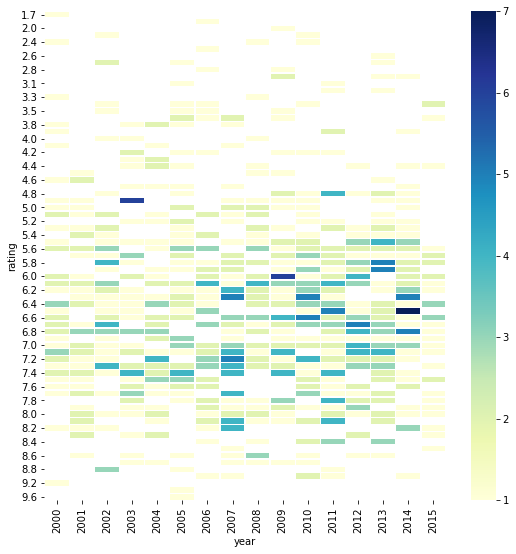

In [43]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(counts, linewidths=0.5, ax=ax, cmap="YlGnBu")

In [47]:
data = list(db.movies.aggregate([
    {"$match": {
        "imdb.rating": {"$exists": "1", "$gte": 0, "$lte": 10},
        "year": {"$exists": "1"},
        "awards.wins": {"$exists": "1"},
        "awards.nominations": {"$exists": "1"},
        "actors": {"$exists": "1"},
    }},
    {"$project": {
        'rating': '$imdb.rating',
        "year": "$year",
        "wins": "$awards.wins",
        "nominations": "$awards.nominations",
        "actors_count": {"$size": "$actors"},
        "genre": {"$arrayElemAt": ["$genres", 0]}
    }}
]))

In [48]:
df = pd.DataFrame(data)

In [49]:
df

,_id,rating,year,wins,nominations,actors_count,genre
0,569190cb24de1e0ce2dfcd50,6.1,2014.0,0.0,6.0,4,Comedy
1,569190cc24de1e0ce2dfcd57,6.8,2013.0,1.0,12.0,4,Adventure
2,569190cc24de1e0ce2dfcd58,7.9,2012.0,0.0,9.0,4,Documentary
3,569190cc24de1e0ce2dfcd59,8.7,1977.0,38.0,27.0,4,Action
4,569190cc24de1e0ce2dfcd5a,8.8,1980.0,15.0,17.0,4,Action
...,...,...,...,...,...,...,...
1706,5692c91524de1e0ce2dfe320,6.8,2012.0,3.0,4.0,4,Drama
1707,5692c91524de1e0ce2dfe321,5.8,2002.0,0.0,0.0,4,Documentary
1708,5692c91624de1e0ce2dfe322,7.4,2005.0,0.0,0.0,4,Documentary
1709,569427c8bcb8793f83332494,8.4,2010.0,56.0,86.0,4,Animation


In [50]:
df = df[['actors_count','nominations', 'rating', 'wins', 'year', "genre"]]

In [51]:
df

,actors_count,nominations,rating,wins,year,genre
0,4,6.0,6.1,0.0,2014.0,Comedy
1,4,12.0,6.8,1.0,2013.0,Adventure
2,4,9.0,7.9,0.0,2012.0,Documentary
3,4,27.0,8.7,38.0,1977.0,Action
4,4,17.0,8.8,15.0,1980.0,Action
...,...,...,...,...,...,...
1706,4,4.0,6.8,3.0,2012.0,Drama
1707,4,0.0,5.8,0.0,2002.0,Documentary
1708,4,0.0,7.4,0.0,2005.0,Documentary
1709,4,86.0,8.4,56.0,2010.0,Animation


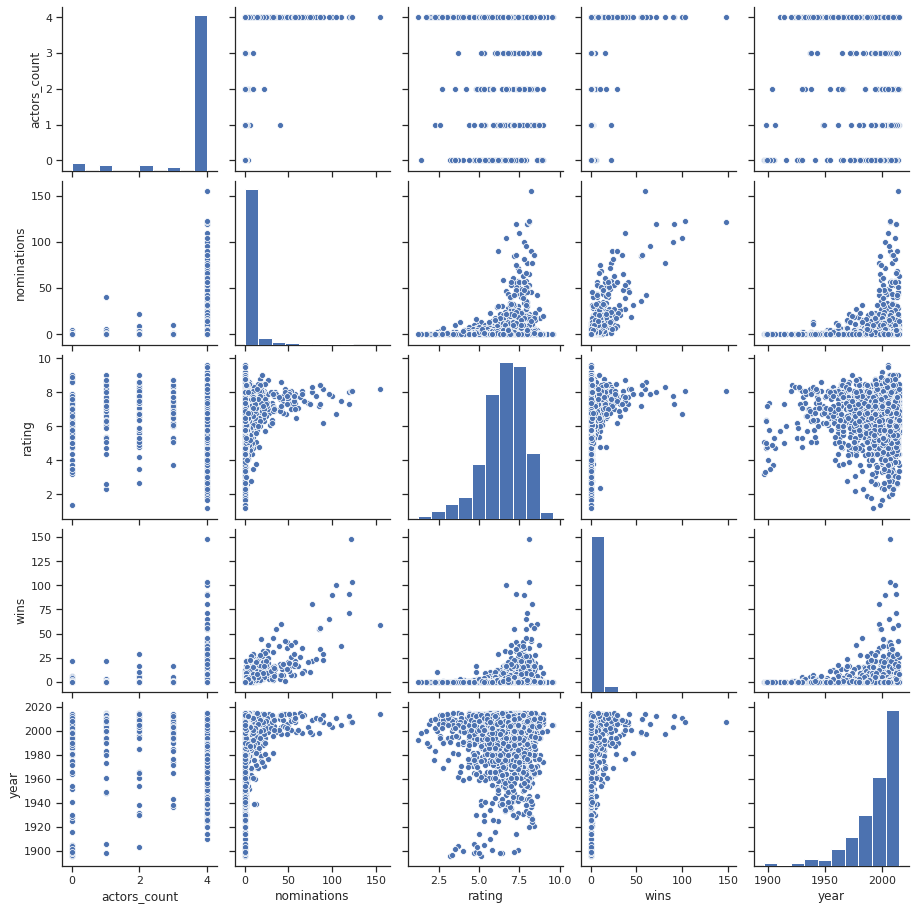

In [52]:
sns.set(style="ticks")
sns.pairplot(df)